# Supplying your own atmospheric sounding

Copyright (c) 2021 Thomas Schanzer.  
Distributed under the terms of the BSD 3-Clause License.

In this notebook, we demonstrate `dparcel`'s ability to handle real atmospheric sounding data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from metpy.units import units
from metpy.plots import SkewT

from dparcel.environment import Environment
from dparcel.parcel import Parcel

As an example, we take sounding data over Sydney, Australia from <http://slash.dotat.org/cgi-bin/atmos>, reading it into a `pandas` dataframe:

In [2]:
file = 'SYDNEY AIRPORT (94767) 16 Jul 2021 00Z.txt'
sounding = pd.read_csv(
    file, names=['pressure', 'height', 'temperature', 'dewpoint'],
    usecols=[0, 1, 2, 3], header=0)
sounding.head()

,pressure,height,temperature,dewpoint
0,1021,35,11.2,9.6
1,1013,99,14.2,8.2
2,1005,165,15.0,9.0
3,1000,206,15.0,9.0
4,999,214,15.0,8.9


Then extract the columns as `numpy` arrays and assign them the correct units. We use the `pint` unit registry supplied in `metpy`.

In [3]:
sounding = sounding.to_numpy()
pressure = sounding[:,0]*units.mbar
height = sounding[:,1]*units.meter
temperature = sounding[:,2]*units.celsius
dewpoint = sounding[:,3]*units.celsius

This is what the sounding looks like on a skew-T log-p diagram:

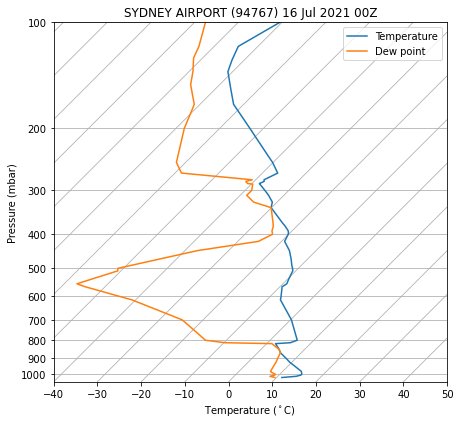

In [4]:
fig = plt.figure(figsize=(8,6))
skew = SkewT(fig, rotation=45)
skew.plot(pressure, temperature, label='Temperature')
skew.plot(pressure, dewpoint, label='Dew point')
skew.ax.legend()
skew.ax.set(
    xlabel=r'Temperature ($^\circ$C)',
    ylabel='Pressure (mbar)',
    title='SYDNEY AIRPORT (94767) 16 Jul 2021 00Z')
fig.tight_layout()
plt.show()

We then instantiate an `Environment`, supplying the sounding arrays and some information to identify the data later:

In [5]:
sydney = Environment(
    pressure, height, temperature, dewpoint,
    info='SYDNEY AIRPORT (94767) 16 Jul 2021 00Z', name='Sydney')

`dparcel` interpolates the sounding we provide, allowing us to query the data at any height or pressure:

In [6]:
sydney.pressure(5.32*units.km)

526.3793103448276 <Unit('millibar')>

In [7]:
sydney.height(309.1*units.mbar)

9256.609999999999 <Unit('meter')>

In [8]:
sydney.temperature(3.22*units.km)

-0.6514506769825921 <Unit('degree_Celsius')>

In [9]:
sydney.dewpoint_from_pressure(299.4*units.mbar)

-38.56 <Unit('degree_Celsius')>

We may also calculate derived variables at any height:

In [10]:
sydney.wetbulb_temperature(2.19*units.km)

-2.133978225990675 <Unit('degree_Celsius')>

In [11]:
sydney.specific_humidity(6.77*units.km)

0.0005668152743663845 <Unit('dimensionless')>

In [12]:
sydney.density(4.89*units.km)

0.734725618621596 <Unit('kilogram / meter ** 3')>

In [13]:
sydney.dcape_dcin()

(123.01795081346282 <Unit('meter ** 2 / second ** 2')>,
 -450.43506401330427 <Unit('meter ** 2 / second ** 2')>)

If we wished to simulate the motion of downdraft parcels in this sounding, we would simply instantiate a `Parcel` object, supplying the same arguments used to create the `Environment` object, like so:

In [14]:
parcel = Parcel(
    pressure, height, temperature, dewpoint,
    info='SYDNEY AIRPORT (94767) 16 Jul 2021 00Z', name='Sydney')

See the "Simulating the motion of a downdraft parcel" tutorial for information on performing parcel calculations.